In [2]:
import pandas as pd
import numpy as np                 # importing the necessary libraries that we would be needing
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style


song_info = pd.read_csv("/content/drive/MyDrive/ML_project/10000.txt",sep='\t',header=None) # reading our txt file that contains user data
song_info.columns = ['user_id', 'song_id', 'listen_count'] # these are the columns of our user data

# Now we will be reading our csv file that contains the data of every song
song_actual =  pd.read_csv('/content/drive/MyDrive/ML_project/song_data.csv')
song_actual_drop = song_actual.drop_duplicates(['song_id'], inplace=True) # here we are combining both the files on song_id

#thus we finally create our final dataframe that contains user_id, song_id, listen_count and other song details
songs = pd.merge(song_info, song_actual, on="song_id", how="left")

In [3]:
songs.head() # here you can see how our final dataframe looks like

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [4]:
songs.to_csv('songs.csv', index=False) # we are converting our dataframe to a csv file

In [5]:
songs_df = pd.read_csv('songs.csv') # reading the csv file and storing the info in songs_df dataframe
songs_df.head(5)

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


Now we need to filter our dataset in order to keep only the users which are active and keep the songs that are popular. 

*   In order to do so we will be sorting our data based on two different things.
*   Firstly, we will filter out the inactive users from the dataset. hence we will only include the users who have listened to atleast 10 songs. 
*   Secondly, we will filter out the unpopular songs from the dataset. hence we will only include the songs which have been listened to by atleast 100 users.



In [6]:
user_listens_song = songs_df.groupby('user_id')['song_id'].count() # dataframe to filter inactive users
songs_and_users = songs_df.groupby('song_id')['user_id'].count() # dataframe to filter unpopular songs

final_users_list = user_listens_song[user_listens_song > 10].index.to_list() # specifying condition to filter users 
final_songs_list = songs_and_users[songs_and_users > 100].index.to_list() # specifying conditions to filter songs


In [7]:
# let us now filter our original dataset so that it contains only users who have listened more than 10 songs using the above variable
# and along with that let us also drop the unpopular songs i.e. we only keep the songs that a user has listened atleast 100 times.
# hence in the next two lines we are creating our final dataset after filtering the users
songs_df_drop_users = songs_df[songs_df['user_id'].isin(final_users_list)].reset_index(drop=True)
songs_df_final = songs_df_drop_users[songs_df_drop_users['song_id'].isin(final_songs_list)].reset_index(drop=True) # this is our final dataframe

# here we will be printing the characteristics of our final dataset that we have created after filtering songs and users.

print('shape of original songs dataset: ', songs_df.shape)
print('shape of songs dataset after dropping inactive users: ', songs_df_drop_users.shape)
print('shape of songs dataset after dropping unpopualar songs and inactive users both is: ', songs_df_final.shape)
print("")
print("therefore our final dataset after removing the inactive users and unpopular songs has these many observations:  ",songs_df_final.shape[0])
print("")
#songs_df_final.head(5)

shape of original songs dataset:  (2000000, 7)
shape of songs dataset after dropping inactive users:  (1839686, 7)
shape of songs dataset after dropping unpopualar songs and inactive users both is:  (1584830, 7)

therefore our final dataset after removing the inactive users and unpopular songs has these many observations:   1584830



In [8]:
songs_df_final =songs_df_final[:2000000]
songs_df_final.shape

(1584830, 7)

In [9]:
# here we are creating the pivot table from our dataset and filling the null values with "0" using the fillna() function.
songs_df_pivot = songs_df_final.pivot(
    index='user_id', 
    columns='song_id', 
    values='listen_count').fillna(0)
songs_df_pivot.head(5)
#songs_df_pivot.shape

song_id,SOAACPJ12A81C21360,SOAAFAC12A67ADF7EB,SOAAFYH12A8C13717A,SOAAROC12A6D4FA420,SOAATLI12A8C13E319,SOAAUKC12AB017F868,SOAAVUV12AB0186646,SOAAWEE12A6D4FBEC8,SOABHYV12A6D4F6D0F,SOABJBU12A8C13F63F,SOABJTC12A58A7DE0E,SOABNLP12A6D4F87F4,SOABNPW12A6D4FC9B5,SOABRAB12A6D4F7AAF,SOABTTR12A6D4FC2EB,SOACBLB12AB01871C7,SOACDMD12A67AD8332,SOACIPG12A8AE47E1C,SOACKIA12A6D4F73D7,SOACNQJ12A8C13B09E,SOACPBY12A8C13FEF9,SOACPSU12A81C231EF,SOACRBY12AB017C757,SOACWQZ12A67ADE5EC,SOACYKU12A5891CC64,SOADCFY12A6310E353,SOADELR12AB0181A6D,SOADISH12AB018DFAC,SOADJGO12AB0185D5B,SOADJQJ12A8C141D38,SOADKJJ12A67ADB371,SOADKOB12AB017DB36,SOADMKP12A8C13BAA4,SOADMTV12A6701FA3F,SOADOQJ12A8AE45C7E,SOADQPP12A67020C82,SOADVUP12AB0185246,SOADZWN12A8C136C60,SOAECLL12A58A7E668,SOAEEMQ12A8C142D36,...,SOZVPGO12A6D4F8C9A,SOZVSSP12AB01819DE,SOZVTFB12AF729FEAA,SOZVTRJ12A8C14308B,SOZVUCT12A8C1424BE,SOZVUUB12A8C13B5EF,SOZVVMJ12A58A7C548,SOZVVRE12A8C143150,SOZVYSU12A6310F227,SOZVZSP12A6D4F6A99,SOZWCBD12AB01848DD,SOZWLHR12A8C13F211,SOZWPHG12AB018666E,SOZWQWL12A58A7EA09,SOZWWTF12A8C1408E2,SOZXBIS12A8AE44A2E,SOZXBVL12AB0184D35,SOZXEZV12A6D4F737F,SOZXHNM12AB017CDEA,SOZXHYA12A8C145274,SOZXKIA12A6D4F861C,SOZXLPJ12A6701F7AB,SOZXMYX12AB018A445,SOZXTUT12A6D4F6D03,SOZXVUF12AC909762A,SOZXVWK12AB018B865,SOZYBGN12A8C13A93C,SOZYDZR12A8C13F4F0,SOZYNNT12A81C22E0F,SOZYSDT12A8C13BFD7,SOZYUGZ12A8AE472AC,SOZZFTH12A6701E983,SOZZHQT12AB018B714,SOZZIOH12A67ADE300,SOZZLZN12A8AE48D6D,SOZZRHE12A6702165F,SOZZTCU12AB0182C58,SOZZTNF12A8C139916,SOZZVWB12AB0189C30,SOZZWZV12A67AE140F
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000a5c8b4d8b2c98f7a205219181d039edcd4506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000b474f815bcff17a4bc9ce5324f9352dafe07d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000ebc858861aca26bac9b49f650ed424cf882fc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000ef25cc955ad5841c915d269432eea41f4a1a5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



In the next step, we will be normalizing our pivot table by first converting it into an array using to_numpy function and then subtracting the mean of the data from array in order to normalize the data.

Normalization is the process of converting the values of numeric columns in a dataset to a common scale without distorting the ranges of values or losing details.


In [10]:
song_df_array = songs_df_pivot.to_numpy()                                     # converting the pivot table to array using to_numpy() function.   
user_listen_count_mean = np.mean(song_df_array, axis = 1)                     # finding the mean for every user's listen count
song_df_array_norm = song_df_array - user_listen_count_mean.reshape(-1, 1)    # normalizing our data by subtracting mean from the array

In [11]:
song_df_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
user_listen_count_mean.reshape(-1,1)

array([[0.00153374],
       [0.00214724],
       [0.02116564],
       ...,
       [0.00214724],
       [0.00291411],
       [0.00337423]])

In [13]:
song_df_array_norm                                   # printing our normalized array

array([[-0.00153374, -0.00153374, -0.00153374, ..., -0.00153374,
        -0.00153374, -0.00153374],
       [-0.00214724, -0.00214724, -0.00214724, ..., -0.00214724,
        -0.00214724, -0.00214724],
       [-0.02116564, -0.02116564, -0.02116564, ..., -0.02116564,
        -0.02116564, -0.02116564],
       ...,
       [-0.00214724, -0.00214724, -0.00214724, ..., -0.00214724,
        -0.00214724, -0.00214724],
       [-0.00291411, -0.00291411, -0.00291411, ..., -0.00291411,
        -0.00291411, -0.00291411],
       [-0.00337423, -0.00337423, -0.00337423, ..., -0.00337423,
        -0.00337423, -0.00337423]])

# **Basics of Singular Value Decomposition**

*   Now as we have a very sparse matrix, so we will be using the SVD algorithm from the scipy.sparse.linalg library
*   SVDs from scipy.sparse.linalg computes the largest or smallest k singular values/vectors for a sparse matrix.
*   In the svds function we will input two things - our sparse matrix i.e. R_demeaned and k which is number of singular values and vectors to compute.
*   the svds function will output three matrices to us - U, Sigma, and Vtranspose. 

The contents/ details of every matrix is described below



1.   **U matrix** - The relationship between users and latent factors is represented by U, a m x r orthogonal left singular matrix.
2.   **Sigma Matrix** - S is a r x r diagonal matrix, which describes the strength of each latent factor.
3.   **V transpose Matrix** - V is a r x n diagonal right singular matrix that shows how items and latent factors are connected.

The latent factors here are the characteristics of the item. By removing the utility matrix A's latent factors, the SVD reduces its dimension. It creates an r-dimensional latent space for each user and item. This mapping makes it easier to see the connections between users and items.





In [14]:
# as described above we will import the svds function from the scipy.sparse.linalg library because we have a sparse matrix.
from scipy.sparse.linalg import svds
U_matrix, sigma_matrix, V_t_matrix = svds(song_df_array_norm, k = 50) 

In [15]:
sigma_matrix = np.diag(sigma_matrix)

# here we are first taking the dot product of the U_matrix and the sigma_matrix
# in the next step, we are taking the dot product of the dot product of U and sigma matrix and V transpose Matrix
# finally we will be adding the mean of the user_listen_count to the dot product above as the regularization term


Predicted_Ratings_users = np.dot(np.dot(U_matrix, sigma_matrix), V_t_matrix) + user_listen_count_mean.reshape(-1, 1)

# here we are creating our predicted data frame based on the predicted ratings we have calculated above

df_predicted_data = pd.DataFrame(Predicted_Ratings_users, columns = songs_df_pivot.columns)
df_predicted_data.head()

song_id,SOAACPJ12A81C21360,SOAAFAC12A67ADF7EB,SOAAFYH12A8C13717A,SOAAROC12A6D4FA420,SOAATLI12A8C13E319,SOAAUKC12AB017F868,SOAAVUV12AB0186646,SOAAWEE12A6D4FBEC8,SOABHYV12A6D4F6D0F,SOABJBU12A8C13F63F,SOABJTC12A58A7DE0E,SOABNLP12A6D4F87F4,SOABNPW12A6D4FC9B5,SOABRAB12A6D4F7AAF,SOABTTR12A6D4FC2EB,SOACBLB12AB01871C7,SOACDMD12A67AD8332,SOACIPG12A8AE47E1C,SOACKIA12A6D4F73D7,SOACNQJ12A8C13B09E,SOACPBY12A8C13FEF9,SOACPSU12A81C231EF,SOACRBY12AB017C757,SOACWQZ12A67ADE5EC,SOACYKU12A5891CC64,SOADCFY12A6310E353,SOADELR12AB0181A6D,SOADISH12AB018DFAC,SOADJGO12AB0185D5B,SOADJQJ12A8C141D38,SOADKJJ12A67ADB371,SOADKOB12AB017DB36,SOADMKP12A8C13BAA4,SOADMTV12A6701FA3F,SOADOQJ12A8AE45C7E,SOADQPP12A67020C82,SOADVUP12AB0185246,SOADZWN12A8C136C60,SOAECLL12A58A7E668,SOAEEMQ12A8C142D36,...,SOZVPGO12A6D4F8C9A,SOZVSSP12AB01819DE,SOZVTFB12AF729FEAA,SOZVTRJ12A8C14308B,SOZVUCT12A8C1424BE,SOZVUUB12A8C13B5EF,SOZVVMJ12A58A7C548,SOZVVRE12A8C143150,SOZVYSU12A6310F227,SOZVZSP12A6D4F6A99,SOZWCBD12AB01848DD,SOZWLHR12A8C13F211,SOZWPHG12AB018666E,SOZWQWL12A58A7EA09,SOZWWTF12A8C1408E2,SOZXBIS12A8AE44A2E,SOZXBVL12AB0184D35,SOZXEZV12A6D4F737F,SOZXHNM12AB017CDEA,SOZXHYA12A8C145274,SOZXKIA12A6D4F861C,SOZXLPJ12A6701F7AB,SOZXMYX12AB018A445,SOZXTUT12A6D4F6D03,SOZXVUF12AC909762A,SOZXVWK12AB018B865,SOZYBGN12A8C13A93C,SOZYDZR12A8C13F4F0,SOZYNNT12A81C22E0F,SOZYSDT12A8C13BFD7,SOZYUGZ12A8AE472AC,SOZZFTH12A6701E983,SOZZHQT12AB018B714,SOZZIOH12A67ADE300,SOZZLZN12A8AE48D6D,SOZZRHE12A6702165F,SOZZTCU12AB0182C58,SOZZTNF12A8C139916,SOZZVWB12AB0189C30,SOZZWZV12A67AE140F
0,0.001740,0.001707,0.001598,0.001483,0.001678,0.001680,0.001335,0.001553,0.001018,0.000428,0.000932,0.001685,0.001741,0.001685,0.001671,-0.000055,0.001698,0.000537,0.001675,0.001670,0.001683,0.001708,0.001520,0.001735,0.001717,0.001682,0.001427,0.001676,0.001651,0.000763,0.001711,0.001692,0.001638,0.001725,0.001455,0.000440,0.001691,0.001646,0.001698,0.001697,...,0.001691,0.001631,0.001764,0.001698,0.000962,0.001744,0.001564,-0.000054,0.001727,0.001699,0.001672,0.001591,0.001701,0.001709,0.001688,0.001715,0.001731,0.001774,0.001617,0.001728,0.001476,0.001620,0.001620,0.001662,0.001721,0.001668,0.001756,0.001534,0.001726,0.001020,0.001701,0.001617,0.001635,0.001773,0.001262,0.001718,0.001685,0.001670,0.001724,0.001565
1,0.001412,0.001690,0.001823,0.002780,0.001849,0.001610,0.003119,0.002467,0.005148,0.006712,0.001929,0.001721,0.001548,0.001813,0.001773,0.001134,0.001727,0.007588,0.001921,0.001633,0.001631,0.001411,0.001429,0.001565,0.001663,0.001834,0.001821,0.001886,0.001602,0.002232,0.001620,0.001355,0.001837,0.001497,0.001983,0.004521,0.001774,0.001654,0.001899,0.001774,...,0.001751,0.001920,0.001497,0.001765,0.003962,0.001644,0.002457,0.002518,0.001599,0.001614,0.001842,0.002184,0.001700,0.001614,0.001840,0.001709,0.001728,0.001477,0.001891,0.001471,0.002632,0.002202,0.001835,0.001940,0.001617,0.001850,0.001411,0.002712,0.001562,0.004580,0.001736,0.002096,0.001791,0.001473,0.002714,0.001642,0.001701,0.001556,0.001645,0.001158
2,0.011108,0.011136,0.000241,0.014183,0.011794,0.012399,0.040400,0.012795,0.031113,0.063269,-0.018985,0.011339,0.010611,0.012324,0.012523,0.055586,0.010929,0.035685,0.008735,0.013042,0.015365,0.030348,0.011131,0.009158,0.010783,0.011142,0.032886,0.018594,0.003728,-0.210223,0.012176,0.016499,0.027849,0.012400,0.005361,0.133547,0.010017,0.010150,0.013411,0.011595,...,0.011982,0.013387,0.020979,0.013668,0.053676,0.011233,0.011242,0.274989,0.010497,0.009918,0.012115,0.009562,0.010018,0.011605,0.013701,0.011330,0.009913,0.010486,0.016031,0.012772,0.018405,0.005917,0.012987,0.010613,0.010885,0.011119,0.007985,0.013473,0.010707,0.026443,0.009493,0.012244,0.011554,0.011005,0.003017,0.010451,0.008434,0.019669,0.010703,-0.005402
3,0.019234,0.019090,0.018731,0.018769,0.019046,0.018661,0.019114,0.018581,0.018195,0.017983,0.021577,0.019144,0.019188,0.019017,0.018592,-0.011414,0.019261,0.015562,0.018289,0.019314,0.018688,0.019765,0.017859,0.019244,0.019152,0.019184,0.020916,0.018487,0.019284,-0.033767,0.019313,0.

# **Recommending the songs to user**

Here we are defining a function for recommending the songs to a user.

In [16]:
def recommend_songs(df_predicted, User_ID, songs_data, listen_count_data, Number_of_recommendations):
    
    # as the user id starts from 1 and not 0, we define the user_index as User_ID - 1
    User_index = User_ID - 1 
    # now we will be sorting the predicted_ratings for every user in descending order
    User_sorted_predictions = df_predicted.iloc[User_index].sort_values(ascending=False) 

    #finally we will get the user's data and then merge the user's data into the song information and name it user_song_info 
    user_info = listen_count_data[listen_count_data.user_id == (User_ID)]
    user_song_info = (user_info.merge(songs_data, how = 'left', left_on = 'song_id', right_on = 'song_id').
                     sort_values(['listen_count'], ascending=False)
                 )

    # Now our task is to recommend songs to the user that the user hasn't listened to yet but he will find it interesting
    # We will only take the songs that the user hasn't listened to yet by taking help of ~ operator and .isin() operator of Python
    # Then we will merge the songs dataframe with our user_predicted_ratings dataframe and sort it in descending order.
    # As we are sorting it in descending order, we are getting the best songs that we would want to recommend to our user
    # finally using the iloc function of python, we will show the top n (number of songs the user wanted) songs recommended by our system to the user. 
    recommendation_song_list = (songs_data[~songs_data['song_id'].isin(user_song_info['song_id'])]).merge(pd.DataFrame(User_sorted_predictions).reset_index(), how = 'left', left_on = 'song_id',
               right_on = 'song_id').rename(columns = {User_index: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:Number_of_recommendations, :-1]
                      

    return user_song_info, recommendation_song_list 



In [17]:
# here we are asking the user to enter his/her id and based on his/her profile we will recommend songs to him.

input1  = input("enter your user id :")
input2 = input("how many song you want to recommend :")


enter your user id :30
how many song you want to recommend :10


In [18]:
user = int(input1) 
num_rec = int(input2)

# here we are calling the fucntion recommend_songs and passing the arguments
# 1. df_predicted_data - This is our predicted dataset that we found out using SVD
# 2. user - This is the ID of the user to whom we want to recommend the songs to
# 3. song_actual - this is the listen_count value for songs
# 4. song_info - this is the information of each song
# 5. num_rec - these are the number of predictions that the user wants
user_song_info, recommendation_song_list = recommend_songs(df_predicted_data, user , song_actual, song_info, num_rec)


# here you can see that we are not recommending any songs that the user has listened before.
# We are only recommending the songs that the user has not listened to before i.e. new songs
user_song_info.head(10)


,user_id,listen_count,song_id,title,release,artist_name,year


In [ ]:
ss 

In [21]:
# here we are finally printing the recommendations for our user whose user_id we inputted above
print('The Recommendation for user id {} are :'.format(user))
print(' ')
recommendation_song_list

The Recommendation for user id 30 are :
 


,song_id,title,release,artist_name,year
155260,SOAFTRR12AF72A8D4D,Harder Better Faster Stronger,Discovery,Daft Punk,2007
929922,SODACBL12A8C13C273,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
410996,SOWCKVR12A8C142411,Use Somebody,Use Somebody,Kings Of Leon,2008
136053,SOLLNTU12A6701CFDC,Kryptonite,Total 90s,3 Doors Down,1997
871448,SOPSOHT12A67AE0235,Almaz,Every Kind Of Mood,Randy Crawford,1986
329598,SOCKSGZ12A58A7CA4B,Bleed It Out [Live At Milton Keynes],Road To Revolution: Live At Milton Keynes,Linkin Park,2008
867043,SOPQLBY12A6310E992,Creep (Explicit),Pablo Honey,Radiohead,1993
420069,SOPXKYD12A6D4FA876,Yellow,Yellow,Coldplay,2000
319597,SOKLRPJ12A8C13C3FE,The Scientist,The Scientist,Coldplay,2002
210381,SOUJVIT12A8C1451C1,Savior,Appeal To Reason,Rise Against,2008


# **Evaluating the RMSE of our model**

Through a library called **Surprise** , we will be finding out the rmse.

*   Surprise is a library in Python used for analyzing recommender systems.
*   We will be using it to calculate the RMSE of our model.


**RMSE** - RMSE stands for Root Mean Squared Error. This is defined as the square root of the average squared distance between the actual score and the predicted score


In [ ]:
pip install  surprise

     |████████████████████████████████| 11.8MB 11.2MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617600 sha256=bf5ca43bc29c159d21ce9a19d45ee45c2b23c7614fda991efa332819a05e1de6
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split    # from the surprise library we are importing all necessary libraries
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [ ]:
df_songs = pd.read_csv('songs.csv')  # reading our datafile and storing it in df_songs

In [ ]:
song_user = df_songs.groupby('song_id')['user_id'].count()  # counting the number of songs listened by each user

In [ ]:
user_counts = df_songs.groupby('user_id')['song_id'].count()

# now we only want to consider the active users.
# we are defining active users as users who have listened to atleast 10 songs. The remaining ones will be left out
user_ten_id = user_counts[user_counts > 10].index.to_list()
print(user_ten_id)

['000a5c8b4d8b2c98f7a205219181d039edcd4506', '000b474f815bcff17a4bc9ce5324f9352dafe07d', '000e2c2a8c7870ff9121f212b35c8b3a20cc0e67', '000ebc858861aca26bac9b49f650ed424cf882fc', '000ef25cc955ad5841c915d269432eea41f4a1a5', '00125672fad06bc57f5a4304cceea9effab07839', '0012bf75d43a724f62dc746d9e85ae0088a3a1d6', '001322829b5dc3edc59bf78189617ddd8f23c82a', '00185e316f07f0f00c325ca034be59c15b362401', '0019740e3e8c24e223a6f88e3faa7c144ec5a014', '001b005fe5e80d3cb45f320f5658fc8e2e72794e', '001ca8a1cbcfb781f8c6f84dee6374fb1ab5b30c', '001f22c638730aed5659034c447d3cf0e658898e', '0021d9a4628624f6d70237f9c200ab82e766bf26', '0022c3932761ce91d8a034318402cfb63224f894', '0023a091b8a916ca98ebc25f6070c683ac7602a0', '002543003041db1d049206b09426d5cdffc0f451', '0027f373a116bb4223ce63c0358f11619b52da6c', '0028292aa536122c1f86fd48a39bd83fe582d27f', '00291ddb6797aab64b0bb51d7a8db32def906447', '00292cf9c6d6e99c5ddbece7e37f957ab1362d25', '00296f66ed7fb84c876486aecc9fab2d5809576d', '002b2cac346703445a5647fa5a0e85

In [ ]:
# Get how many user have listened to each song
song_counts = df_songs.groupby('song_id')['user_id'].count()

# now we only want to consider the popular songs
# so we are filtering the data as to include only those songs which have been listened to more than 100 times.
song_ten_id = song_counts[song_counts > 100].index.to_list()

print(song_ten_id)

['SOAACPJ12A81C21360', 'SOAAFAC12A67ADF7EB', 'SOAAFYH12A8C13717A', 'SOAAROC12A6D4FA420', 'SOAATLI12A8C13E319', 'SOAAUKC12AB017F868', 'SOAAVUV12AB0186646', 'SOAAWEE12A6D4FBEC8', 'SOABHYV12A6D4F6D0F', 'SOABJBU12A8C13F63F', 'SOABJTC12A58A7DE0E', 'SOABNLP12A6D4F87F4', 'SOABNPW12A6D4FC9B5', 'SOABRAB12A6D4F7AAF', 'SOABTTR12A6D4FC2EB', 'SOACBLB12AB01871C7', 'SOACDMD12A67AD8332', 'SOACIPG12A8AE47E1C', 'SOACKIA12A6D4F73D7', 'SOACNQJ12A8C13B09E', 'SOACPBY12A8C13FEF9', 'SOACPSU12A81C231EF', 'SOACRBY12AB017C757', 'SOACWQZ12A67ADE5EC', 'SOACYKU12A5891CC64', 'SOADCFY12A6310E353', 'SOADELR12AB0181A6D', 'SOADISH12AB018DFAC', 'SOADJGO12AB0185D5B', 'SOADJQJ12A8C141D38', 'SOADKJJ12A67ADB371', 'SOADKOB12AB017DB36', 'SOADMKP12A8C13BAA4', 'SOADMTV12A6701FA3F', 'SOADOQJ12A8AE45C7E', 'SOADQPP12A67020C82', 'SOADVUP12AB0185246', 'SOADZWN12A8C136C60', 'SOAECLL12A58A7E668', 'SOAEEMQ12A8C142D36', 'SOAEHEX12A8C13EFA4', 'SOAEIDM12A6D4F8463', 'SOAEIFW12A8C1391E4', 'SOAEJNB12A8C13F64D', 'SOAETMP12A8C140E7F', 'SOAEUPY1

In [ ]:
# Finally we are combining both the dataframes to arrive at our final dataframe.
# our final dataframe consists of users who have listened to more than 10 songs 
# and songs which have been listened to more than 100 times
df_song_reduced = df_songs[(df_songs['user_id'].isin(user_ten_id)) & (df_songs['song_id'].isin(song_ten_id))].reset_index(drop=True)

In [ ]:
df_song_reduced.shape

(1584830, 7)

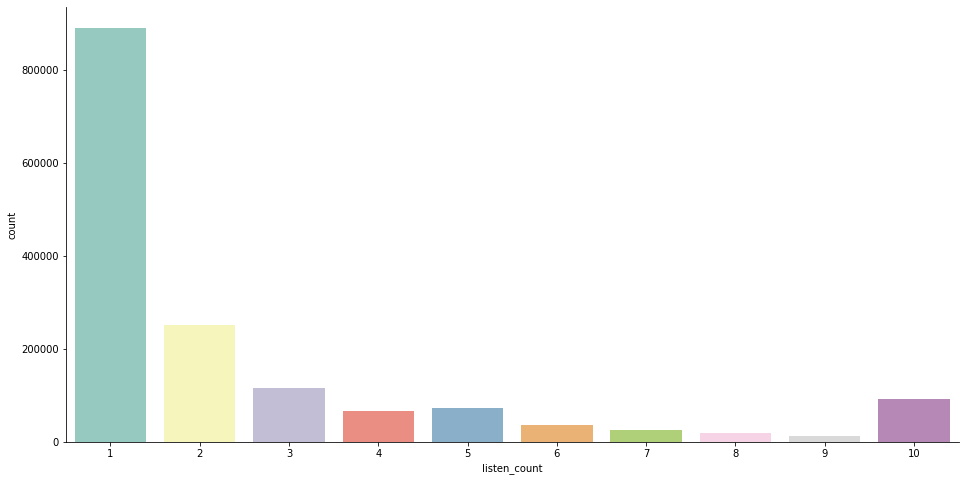

In [ ]:
# our next step is to divide the listen_count value in bins.
# now our highest listen_count value is 2214 so we create ten bins
# any listen_count value between 9 and 2214 is part of the last bin
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2214]
df_song_reduced['listen_count'] = pd.cut(df_song_reduced['listen_count'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
listen_counts = pd.DataFrame(df_song_reduced.groupby('listen_count').size(), columns=['count']).reset_index(drop=False)

plt.figure(figsize=(16, 8))
sns.barplot(x='listen_count', y='count', palette='Set3', data=listen_counts) # plotting the bar plot of the listen_count values we created
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [ ]:
reader = Reader(rating_scale=(1, 10)) # The Reader class in surprise library is used to parse a file containing ratings
data = Dataset.load_from_df(df_song_reduced[['user_id', 'song_id', 'listen_count']], reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=.25) # here we are splitting the data into training and testing

In [ ]:
# here we are defining the list of hyperparameters that we want GridsearchCV to check and give us the best hyperparameters in output

param_grid = {'n_factors': [160], 
              'n_epochs': [100], 
              'lr_all': [0.001, 0.005],  
              'reg_all': [0.08, 0.1]}

# How does GridSearchCV work?

Once specifying hyperparameters and an array of potential values in the param_grid dictionary, GridSearchCV() calculates a score for each combination of hyperparameters on a k-fold cross validated dataset and returns the set of parameters that minimises the mean score across folds. Both the number of folds and the score can be selected by the user (hyper-hyperparameter?!) — we use 3 folds and RMSE accuracy score.

The parameters that we are using in GridsearchCV are -


*   estimator - the model for which we want to find the best hyperparameters
*   param_grid - the dictionary in which we have specified the hyperparameters we want to try
* cv - No of cross-validations we want our model to execute.
* n_jobs - number of procedures that we wish to run in parallel.
* joblib_verbose - in order to get a detailed print out while we try to fit the data to GridSearchCV  



In [ ]:
# here we are defining the parameters and passing it to the GridSearchCV function
grid_search_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, joblib_verbose=4, n_jobs=-2) 

In [ ]:
# find the best parameters for the model
grid_search_svd.fit(data)
find_algo = grid_search_svd.best_estimator['rmse']    #Using an accuracy measure as key, get the algorithm that gave the best accuracy results for the chosen measure, averaged over all splits.
print(grid_search_svd.best_score['rmse'])    # here we are printing the best rmse score that our GridSearchCV got
print(grid_search_svd.best_params['rmse'])  # here we are printing the best parameters that our GridsearchCV found out

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:  8.2min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed: 16.5min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   3 out of   3 | elapsed: 24.8min remaining:    0.0s


2.165437832684868
{'n_factors': 160, 'n_epochs': 100, 'lr_all': 0.005, 'reg_all': 0.1}


[Parallel(n_jobs=-2)]: Done  12 out of  12 | elapsed: 99.5min finished


In [ ]:
# Now we will perform the cross validation using the cross_validate function
cross_validate(find_algo, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.1444  2.1423  2.1432  2.1340  2.1462  2.1420  0.0042  
Fit time          572.16  574.79  588.59  574.36  576.70  577.32  5.82    
Test time         4.77    5.65    6.40    5.67    6.23    5.74    0.57    


{'fit_time': (572.156457901001,
  574.791374206543,
  588.5905306339264,
  574.3605213165283,
  576.6993246078491),
 'test_rmse': array([2.1443923 , 2.14232377, 2.14316471, 2.13396996, 2.14617465]),
 'test_time': (4.767050504684448,
  5.6525421142578125,
  6.401097297668457,
  5.668859958648682,
  6.227940559387207)}

In [ ]:
# finally we will input the best parameters that we found above using GridSearchCV in our final algorithm
# Then we will fit the final_algorithm to our training set
# and finally we will test the test dataset and print out the RMSE score.

final_algorithm = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.1)
final_algorithm.fit(trainset)
test_predictions = final_algorithm.test(testset)
print(f"The RMSE is {accuracy.rmse(test_predictions, verbose=True)}")

RMSE: 2.1508
The RMSE is 2.15079212376168
